# Exploratory Data Analysis (EDA)
This notebook contains the exploratory data analysis for the yeast ML project.

## 1. Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2. Load Dataset

In [18]:
# Load the yeast.data and export as csv file
data = pd.read_csv('yeast.data', sep='\s+', header=None)
# Naming Columns
number_name_map = { 0: 'SeqName', 1: 'mcg', 2: 'gvh', 3: 'alm', 4: 'mit',
                    5: 'erl', 6: 'pox', 7: 'vac', 8: 'nuc', 9: 'ProteinSite' }
data.rename(columns=number_name_map, inplace=True)
data.to_csv('yeast.csv', index=False)


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_27740\3938904711.py:2: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('yeast.data', sep='\s+', header=None)


## 3. Dataset Overview

In [19]:
# Display first few rows
data = pd.read_csv('yeast.csv')
data.head()

,SeqName,mcg,gvh,alm,mit,erl,pox,vac,nuc,ProteinSite
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [20]:
# Dataset shape
print(data.shape)

(1484, 10)


In [21]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SeqName      1484 non-null   object 
 1   mcg          1484 non-null   float64
 2   gvh          1484 non-null   float64
 3   alm          1484 non-null   float64
 4   mit          1484 non-null   float64
 5   erl          1484 non-null   float64
 6   pox          1484 non-null   float64
 7   vac          1484 non-null   float64
 8   nuc          1484 non-null   float64
 9   ProteinSite  1484 non-null   object 
dtypes: float64(8), object(2)
memory usage: 116.1+ KB


In [22]:
# Statistical summary
data.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


## 4. Data Quality Assessment

### 4.1 Missing Values

In [23]:
# Check for missing values
print(data.isnull().sum())

SeqName        0
mcg            0
gvh            0
alm            0
mit            0
erl            0
pox            0
vac            0
nuc            0
ProteinSite    0
dtype: int64


### 4.2 Duplicate Values

In [24]:
# Check for duplicates
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 22


## 5. Univariate Analysis

### 5.1 Target Variable Distribution

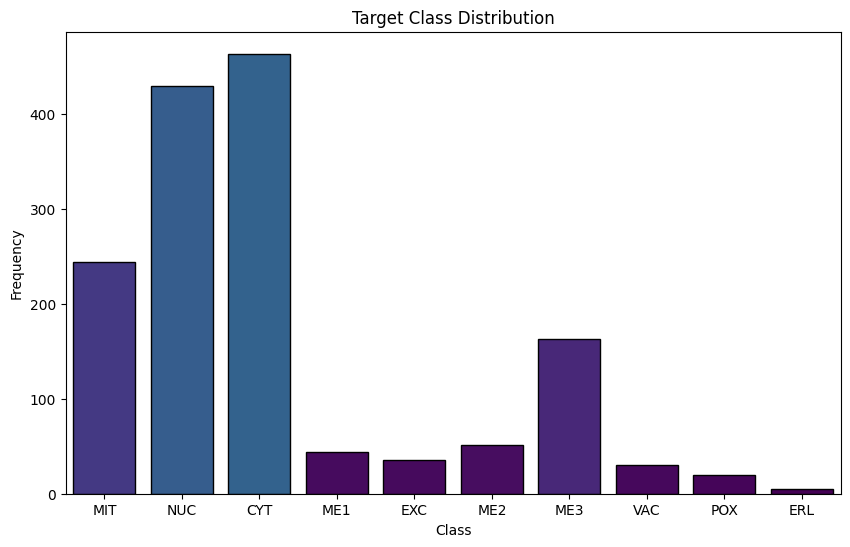

In [55]:
# Analyze target variable distribution
plt.figure(figsize=(10,6))  
sns.countplot(data=data, x=data.columns[-1])
# Gradient color for bars according to frequency
# Possible colormaps: viridis, plasma, inferno, magma, cividis
for i, patch in enumerate(plt.gca().patches):
    height = patch.get_height()
    patch.set_facecolor(plt.cm.viridis(height / data.shape[0]))
    patch.set_edgecolor('black')
    patch.set_linewidth(1)

plt.title('Target Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### 5.2 Numerical Features Distribution

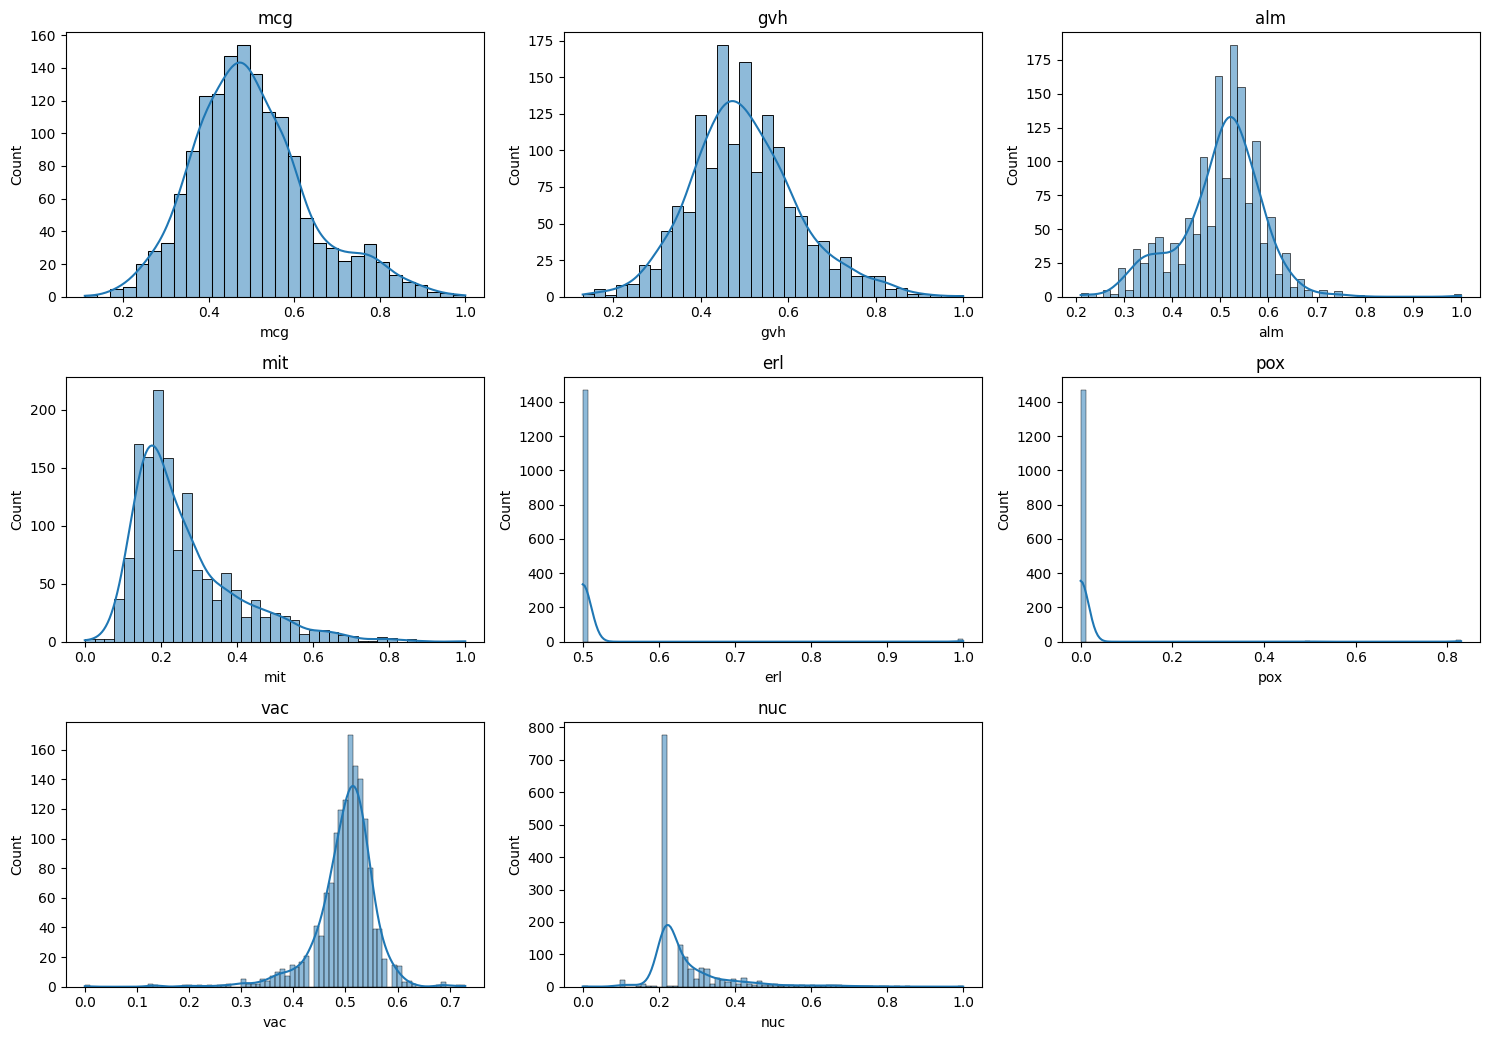

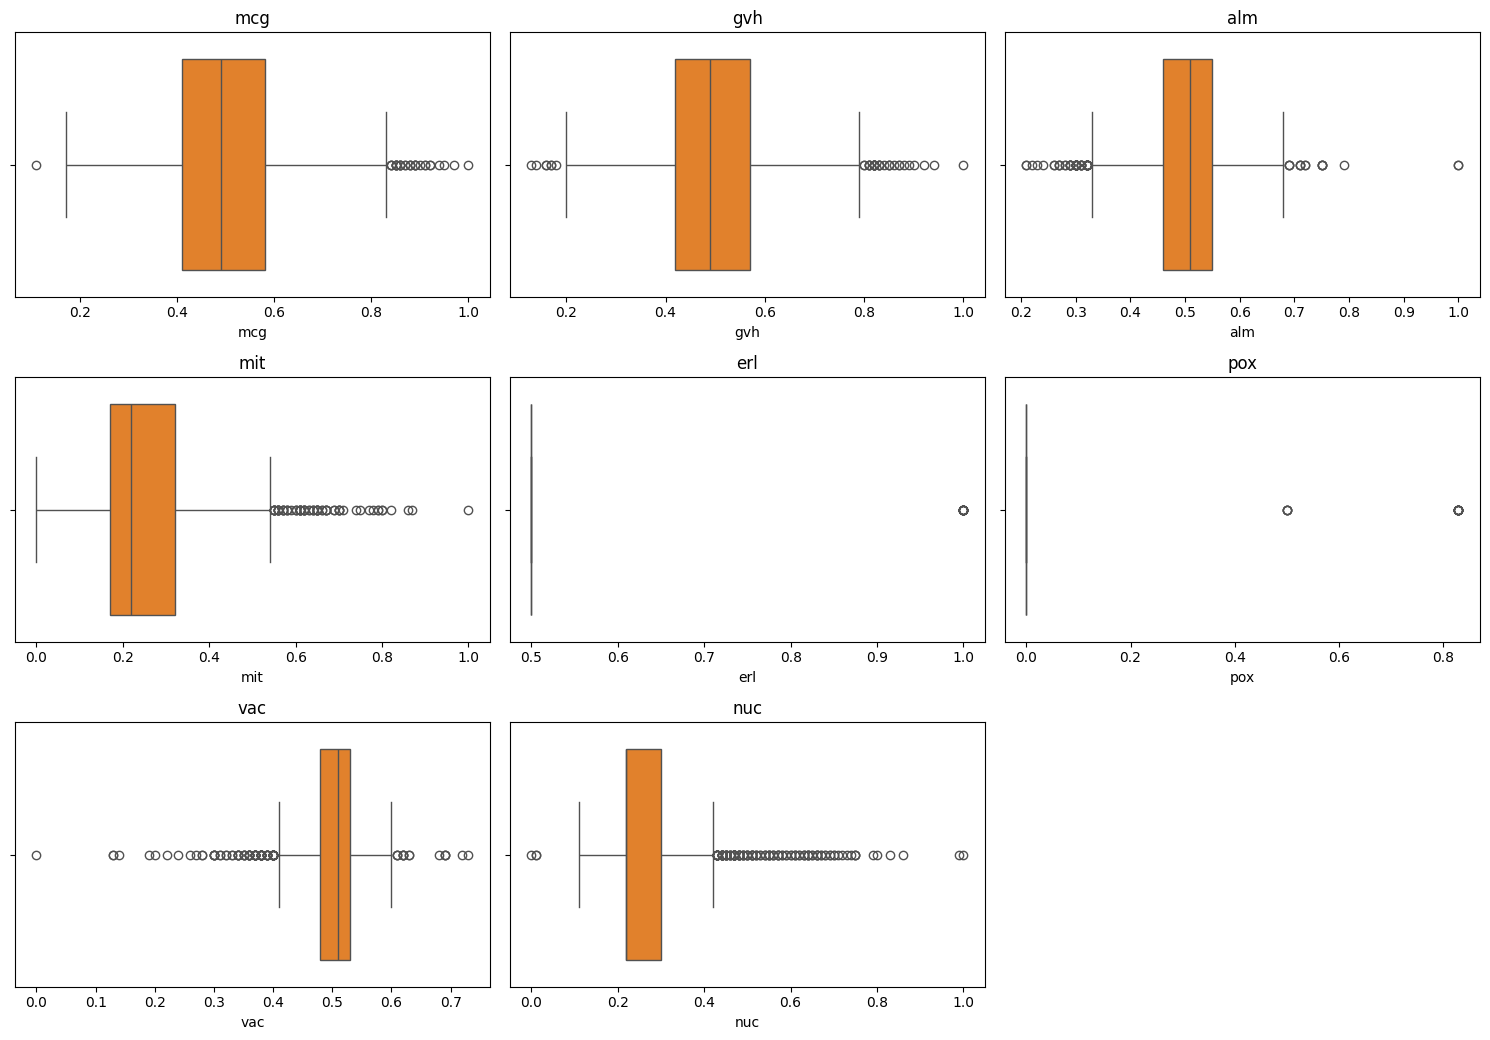

,skew,kurtosis,std,mean
mcg,0.604291,0.459060,0.137299,0.500121
mit,1.444776,2.289971,0.137098,0.261186
gvh,0.416639,0.556111,0.123924,0.499933
nuc,2.413031,7.777762,0.106491,0.276199
alm,-0.220995,1.609320,0.086670,0.500034
pox,10.276884,105.738712,0.075683,0.007500
vac,-1.791641,9.501359,0.057797,0.499885
erl,10.159633,101.354734,0.048351,0.504717


In [ ]:
# Visualize numerical features distribution
import math

num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
target_col = data.columns[-1]
df = data.copy()
if len(num_cols) == 0:
    print("Nenhuma coluna numérica detectada. Verifique os tipos das colunas.")
else:
    # Histogramas + KDE
    cols = 3
    rows = math.ceil(len(num_cols) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 3.5))
    axes = axes.flatten()
    for i, c in enumerate(num_cols):
        sns.histplot(df[c], kde=True, ax=axes[i], color='C0')
        axes[i].set_title(f"{c}")
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

    # Estatísticas: skew, kurtosis, missing
    stats = pd.DataFrame(index=num_cols)
    stats['skew'] = df[num_cols].skew()
    stats['kurtosis'] = df[num_cols].kurtosis()
    stats['std'] = df[num_cols].std()
    stats['mean'] = df[num_cols].mean()
    display(stats.sort_values('std', ascending=False))

### 5.3 Distribuitions Understanding and Data Preparation Insights 


**Análise dos Histogramas:**

🟢 **Features com distribuição normal** (`mcg`, `gvh`, `alm`):
- Distribuições bem comportadas, aproximadamente gaussianas
- **Recomendação**: Não necessitam transformações especiais

🟡 **Features enviesadas** (`mit`):
- Distribuição assimétrica, concentrada em valores baixos
- **Recomendação**: Considerar transformação log, sqrt ou Box-Cox

🔴 **Features com distribuições problemáticas** (`erl`, `pox`, `vac`, `nuc`):
- `erl` e `pox`: Altamente concentradas em poucos valores (0.0, 0.5)
- `vac` e `nuc`: Distribuições bimodais ou extremamente enviesadas
- **Recomendação**: 
  - Verificar se são categóricas disfarçadas de numéricas
  - Considerar binning ou transformação em variáveis dummy
  - Investigar possíveis erros de codificação

## 6. Outlier Detection

In [ ]:
# Identify outliers using boxplots
cols = 3
rows = math.ceil(len(num_cols) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 3.5))
axes = axes.flatten()
for i, c in enumerate(num_cols):
    sns.boxplot(x=df[c], ax=axes[i], color='C1')
    axes[i].set_title(f"{c}")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [ ]:
# Statistical outlier detection

# 1. Verificar valores únicos nas features suspeitas
suspicious_features = ['erl', 'pox', 'vac', 'nuc']
for feature in suspicious_features:
    unique_vals = sorted(df[feature].unique())
    print(f"{feature}:")
    print(f"  - Valores únicos: {len(unique_vals)}")
    print(f"  - Range: {min(unique_vals):.3f} a {max(unique_vals):.3f}")
    print(f"  - Valores: {unique_vals[:10]}{'...' if len(unique_vals) > 10 else ''}")
    
    # Contar frequência dos valores mais comuns
    value_counts = df[feature].value_counts().head(5)
    print(f"  - Top 5 valores mais frequentes:")
    for val, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"    {val}: {count} ocorrências ({percentage:.1f}%)")
    print()

# 2. Verificar assimetria (skewness) de todas as features numéricas
print("=== SKEWNESS DAS FEATURES ===")
skewness = df[num_cols].skew().sort_values(key=abs, ascending=False)
for feature, skew_val in skewness.items():
    interpretation = "Normal" if abs(skew_val) < 0.5 else ("Moderadamente enviesada" if abs(skew_val) < 1 else "Altamente enviesada")
    direction = "direita" if skew_val > 0 else "esquerda"
    print(f"{feature}: {skew_val:.3f} ({interpretation}" + (f" à {direction}" if abs(skew_val) >= 0.5 else "") + ")")

# 3. Detectar outliers usando IQR
print(f"\n=== DETECÇÃO DE OUTLIERS (Método IQR) ===")
outlier_summary = {}
for feature in num_cols:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary[feature] = outlier_count
    print(f"{feature}: {outlier_count} outliers ({outlier_percentage:.1f}%)")

print(f"\nTotal de amostras: {len(df)}")

**Análise dos Boxplots (Outliers):**

- **Poucos outliers**: `mcg`, `gvh`, `alm` → Dados limpos
- **Outliers moderados**: `mit` → Verificar se são biologicamente plausíveis
- **Muitos outliers**: `vac`, `nuc` → Possíveis problemas nos dados

## 7. Multivariate Analysis

### 7.1 Variance Analysis (Pairplot)

Top features by variance: ['mcg', 'mit', 'gvh', 'nuc', 'alm', 'pox']


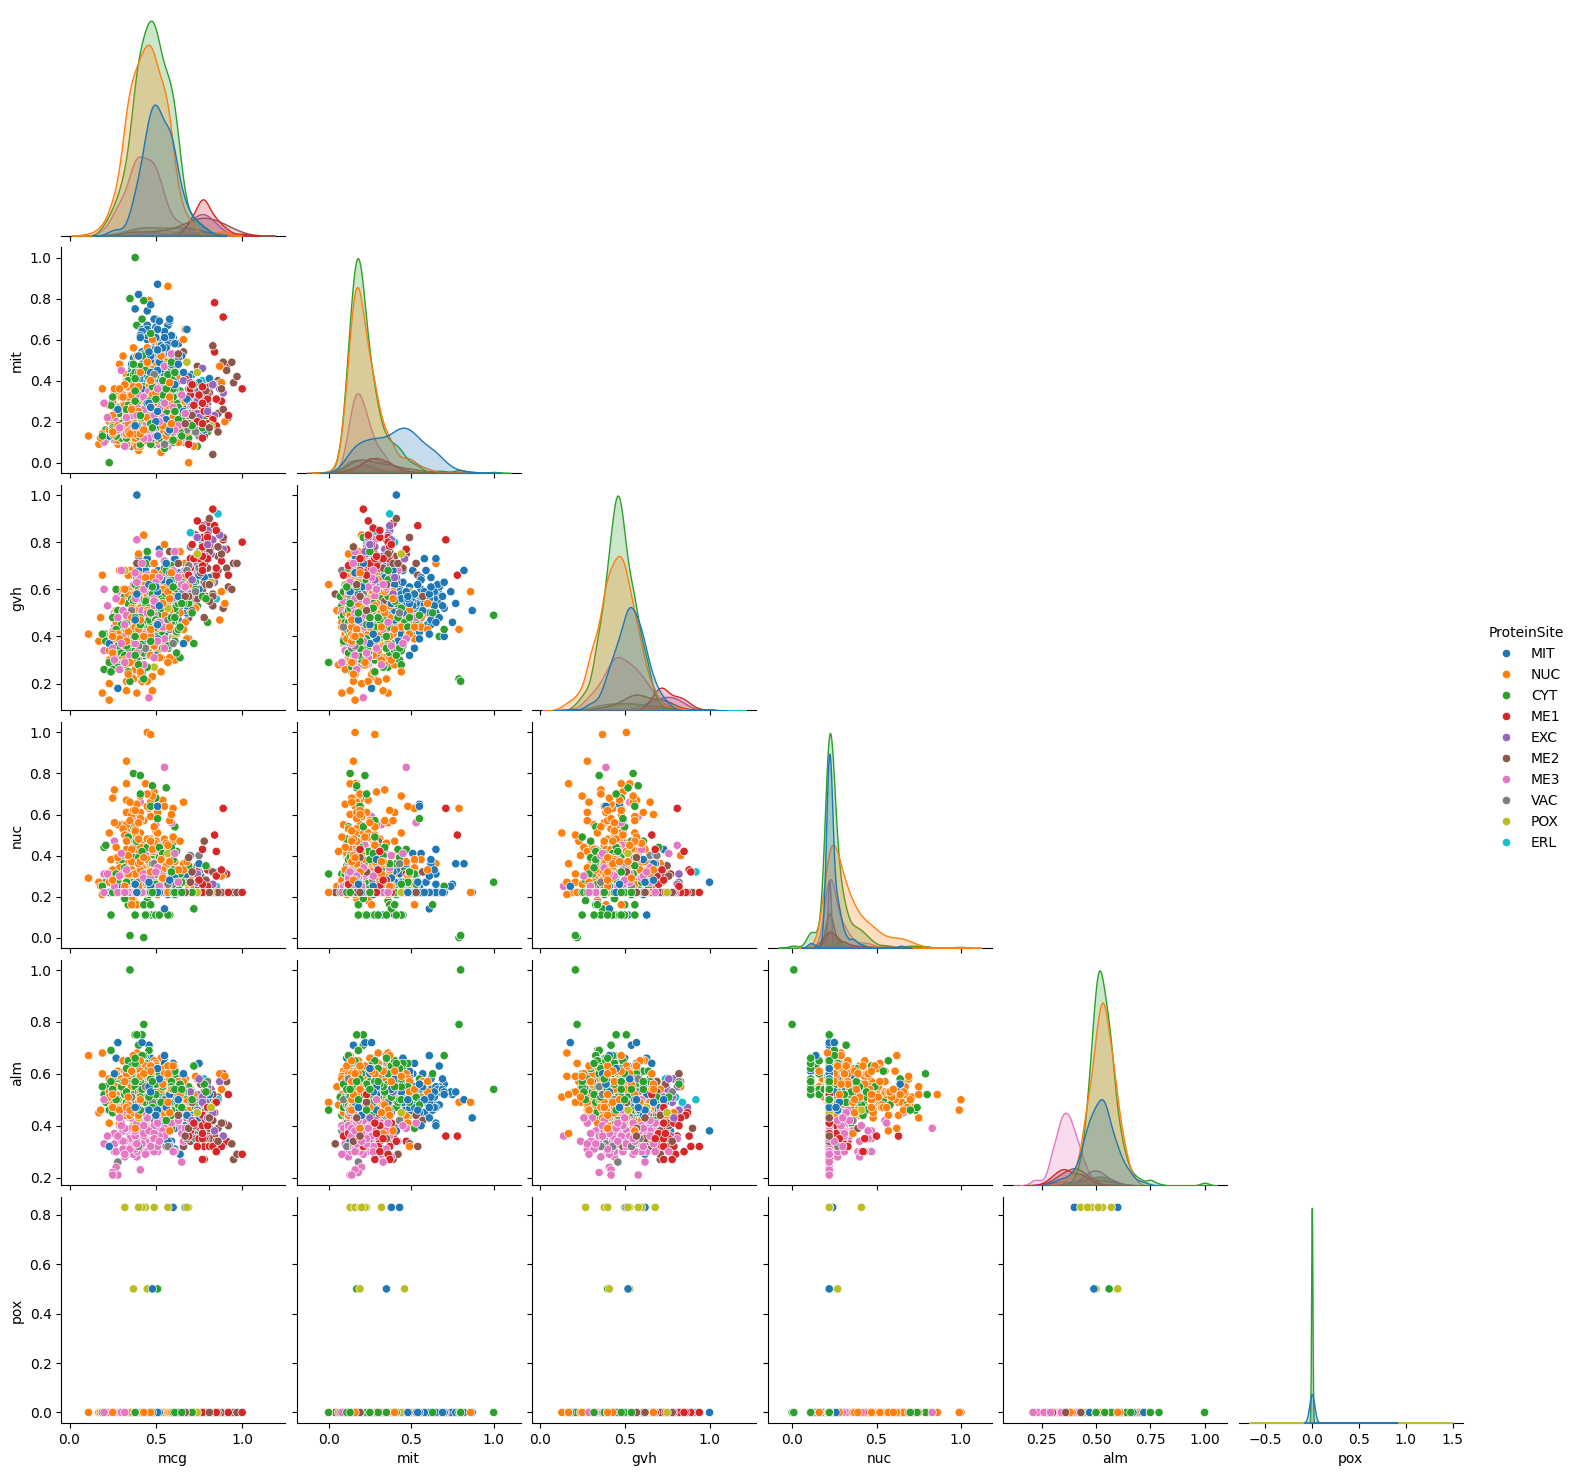

In [62]:

# Pairplot limitado: escolher top k features por variância para não sobrecarregar
k = 6
top_k = df[num_cols].var().sort_values(ascending=False).head(k).index.tolist()
print("Top features by variance:", top_k)
# Usar hue quando target tiver número razoável de classes
use_hue = False
try:
    nunique = df[target_col].nunique()
    if nunique <= 12:
        use_hue = True
except Exception:
    use_hue = False

if use_hue:
    sns.pairplot(df.reset_index(), vars=top_k, hue=target_col, diag_kind='kde', corner=True)
else:
    sns.pairplot(df[top_k], diag_kind='kde', corner=True)
plt.show()

### 6.2 Feature vs Target Analysis (Heatmap)

,mcg,gvh,alm,mit,erl,pox,vac,nuc
ProteinSite,,,,,,,,
CYT,0.480713,0.469503,0.535421,0.227106,0.504320,0.001080,0.499395,0.257235
ERL,0.792000,0.772000,0.482000,0.336000,1.000000,0.000000,0.546000,0.246000
EXC,0.735429,0.716857,0.492571,0.292000,0.500000,0.000000,0.455714,0.226571
ME1,0.788636,0.756591,0.376136,0.311818,0.500000,0.000000,0.512955,0.268182
ME2,0.721569,0.603137,0.414902,0.282549,0.509804,0.000000,0.510196,0.245490
ME3,0.430859,0.489509,0.364294,0.213497,0.503067,0.000000,0.510123,0.270000
MIT,0.521434,0.533238,0.517377,0.404426,0.500000,0.008852,0.501680,0.240984
NUC,0.452448,0.456131,0.529324,0.228345,0.503497,0.000000,0.494103,0.331678
POX,0.521000,0.508000,0.506500,0.247500,0.500000,0.423500,0.503000,0.234000


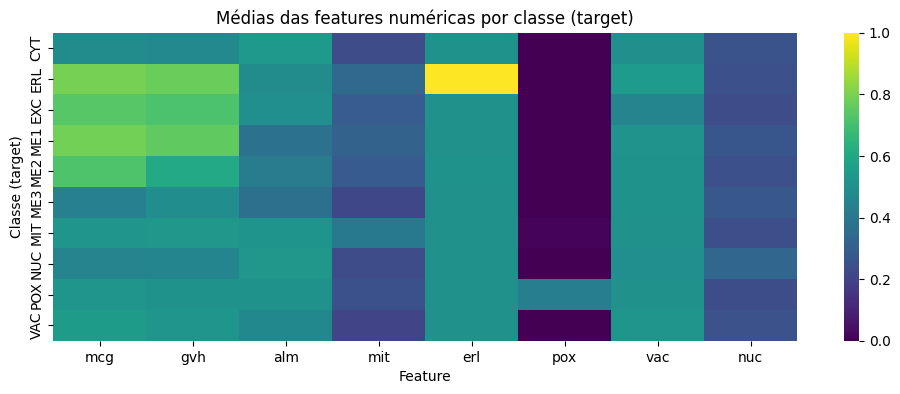

In [46]:
# Analyze relationship between features and target
try:
    if df[target_col].dtype == object or df[target_col].dtype.name == 'category' or df[target_col].nunique() < 20:
        grp = df.groupby(target_col)[num_cols].mean()
        display(grp)
        # Heatmap das médias por classe (pode ser grande)
        plt.figure(figsize=(12, max(4, len(grp)*0.25)))
        sns.heatmap(grp, cmap='viridis', annot=False)
        plt.title('Médias das features numéricas por classe (target)')
        plt.xlabel('Feature')
        plt.ylabel('Classe (target)')
        plt.show()
    else:
        # target numérica: mostrar correlação com target e scatter para top features
        cor_with_target = df[num_cols].corrwith(df[target_col]).abs().sort_values(ascending=False)
        display(cor_with_target)
        top_corr = cor_with_target.head(4).index.tolist()
        for c in top_corr:
            plt.figure(figsize=(6,4))
            sns.scatterplot(x=df[c], y=df[target_col])
            plt.title(f'Scatter: {c} x {target_col}')
            plt.show()
except Exception as e:
    print('Erro ao analisar relação com target:', e)

### 6.3 Correlation Matrix

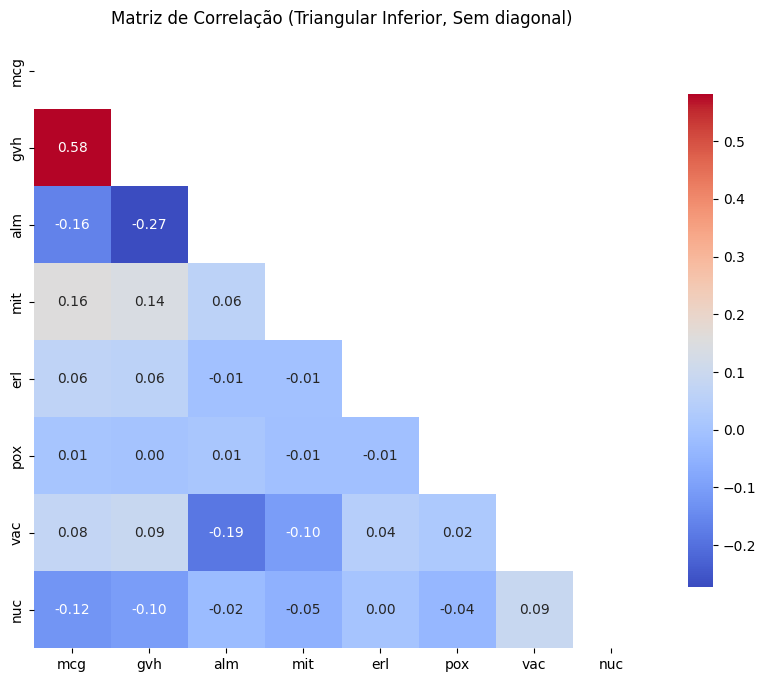

In [50]:
# Matriz de Correlação Triangular Inferior Sem diagonal
corr = df[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação (Triangular Inferior, Sem diagonal)')
plt.show()

## 8. Key Insights and Observations

### Summary of findings:
- 
- 
- 